# phys481 week 10b
# quadrature and finite difference

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.misc import central_diff_weights, derivative

 $$ f(x+\Delta x) = f(x) + f'(x) \Delta x + \frac{f''(x)}{2} {\Delta x}^2 + \frac{f''(x)}{3!} {\Delta 3}^2 \ldots $$

#### forward difference $O(\Delta)$

 $$ f(x+\Delta x) - f(x) =  f'(x) \Delta x + \frac{f''(x)}{2} {\Delta x}^2 + \frac{f'''(x)}{3!} {\Delta x}^3 \ldots $$
 
 $$ f'(x) \Delta x= f(x+\Delta x) - f(x) - \frac{f''(x)}{2} {\Delta x}^2 - \frac{f'''(x)}{3!} {\Delta x}^3 \ldots  $$
 
 $$ f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x} +\; O(\Delta x) $$

#### backward difference (order=1)
 $$ f(x-\Delta x) = -f'(x) \Delta x + \frac{f''(x)}{2} {\Delta x}^2 - \frac{f''(x)}{3!} {\Delta x}^2 \ldots $$

 $$ f'(x) \approx \frac{f(x) - f(x\Delta x)}{\Delta x} \;+\; O(\Delta x) $$

#### centered difference (order=2)

 $$ f(x+\Delta x) - f(x-\Delta x) =  2 f'(x) \Delta x + 2 \frac{f'''(x)}{3!} {\Delta x}^3 \ldots $$
 
 
 $$ f'(x) \approx \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x} + O(\Delta x^2) $$

In [44]:
import fractions
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.central_diff_weights.html
print( central_diff_weights(3), '\n')

for n in [3,5,7]: 
    weights = [fractions.Fraction(str(w)).limit_denominator(1000) for w in central_diff_weights(n)]
    print( weights, '\n' )

[-0.5  0.   0.5] 

[Fraction(-1, 2), Fraction(0, 1), Fraction(1, 2)] 

[Fraction(1, 12), Fraction(-2, 3), Fraction(0, 1), Fraction(2, 3), Fraction(-1, 12)] 

[Fraction(-1, 60), Fraction(3, 20), Fraction(-3, 4), Fraction(0, 1), Fraction(3, 4), Fraction(-3, 20), Fraction(1, 60)] 



### callable and lambda functions

In [16]:
func = np.sin

print( 'function', func.__name__, 'is callable: ', callable(func) )

function sin is callable:  True


In [17]:
def func(x):
    return np.sin(x)

print( 'function', func.__name__, 'is callable: ', callable(func) )

function func is callable:  True


In [18]:
# anonymous "light-weight" function
func = lambda x: np.sin(x)
print( 'function', func.__name__, 'is callable: ', callable(func) )

function <lambda> is callable:  True


[1.00000000e-07 7.19685673e-07 5.17947468e-06 3.72759372e-05
 2.68269580e-04 1.93069773e-03 1.38949549e-02 1.00000000e-01]


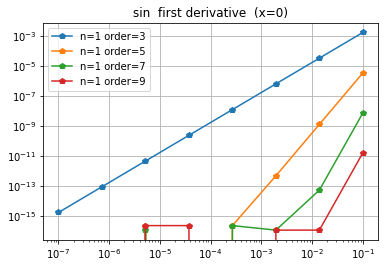

In [19]:
func = {}
func[0] = np.sin
func[1] = np.cos
func[2] = lambda x: -np.sin(x)
x = np.double(0.0)

dxlist = np.geomspace(1e-7, 0.1, 8).astype(np.float64) ; print( dxlist )
x=0.9
n=1

def plot_derivative_accuracy(x=0, n=1, orderlist=(3,5,7,9)):

    for order in orderlist:
        val = [derivative( func[0], x, dx=-dx, n=n, order=order) for dx in dxlist]
        errorlist = np.abs(np.array(val) - func[n](x))
        plt.plot( dxlist, errorlist, '-p', label=f'n={n} order={order}' )

    plt.grid(True) # print(val)
    plt.xscale('log'); plt.yscale('log')
    plt.legend(loc=0)
    plt.title(f' {func[0].__name__}  {("first","second","third")[n-1]} derivative  (x={x}) ' )
    
plot_derivative_accuracy(n=1)

 $$ f(x) = \sin(x) \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots $$
 
 $$ \frac{d}{dx} \sin(x) = \cos(x)  = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} \ldots $$
 
 $$ \frac{d}{dx} f(x) = \frac{ f(x+\Delta x) - f(x + \Delta x)}{2\Delta x} + O(\Delta x^3) $$
 
 $$ \frac{d}{dx} \sin(x=0) \approx \frac{ (x+\Delta x) - (x - \Delta x)}{2\Delta x}  = 1 $$
 
 $$ \frac{d}{dx} \sin(x=0.1) \approx \frac{ \sin(0.1+\Delta x) - \sin(0.1 - \Delta x)}{2\Delta x} ) $$

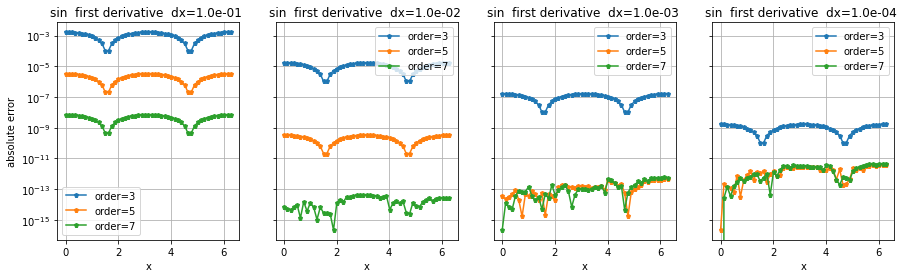

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(15,4), sharey=True)
xlist = np.linspace(0, np.pi*2.0, 51)
n=1; order=5; dx=1e-2

for ax,dx in zip(axes,[1e-1, 1e-2, 1e-3, 1e-4]):
    plt.sca(ax)
    for order in [3,5,7]: 
        val = [derivative( func[0], x, dx=dx, n=n, order=order) for x in xlist]
        errorlist = np.abs( np.array(val) - func[n](xlist)*(1+0*1e10*(order>3) ) )
        plt.plot(xlist, errorlist, 'p-', ms=5, label=f'order={order}' )
    
    plt.yscale('log')
    plt.legend(loc=0)
    plt.title(f'{func[0].__name__}  {("first","second","third")[n-1]} derivative  dx={dx:3.1e} ')
    plt.xlabel('x') #; plt.ylim(1e-8,2e-7)
    if ax is axes[0]: plt.ylabel('absolute error')
    plt.grid(True)

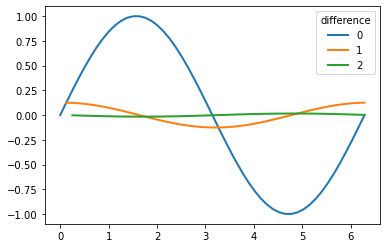

In [21]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.central_diff_weights.html
func = np.sin    
x = np.linspace(0, np.pi*2.0, 51)
y = func(x)
for order in [0,1,2]:
    yy = np.diff( y, order )
    plt.plot(x[order:], yy, lw=2, label=f'{order}')
plt.legend(loc=0, title='difference')

### differences amplify noise

Estimating derivatives (and integrals) usually assumes that the function of interest is well approximated by a low order polynomial.  This is clearly questionable for a wide variety of physically interesting cases such as (but not limited to) trigonometric functions.

Another source of non-polynomial behavior may be generated by random "noise".  The example below shows three estimates of a sin function with three different realizations of scaled uniform ([0,0.1]) random noise shown by the blue curve.  Finite difference estimates of the first and second derivative are also shown by the orange and green curves.

The derivatives exhibit significant fluctuations with amplitudes much larger than the range of the "true" values.  Perhaps worse, there appear to be significant correlations between the derivatives.  It may be tempting to interpret these kinds of features as physically significant oscillations, when they are in fact just numerical artifacts.

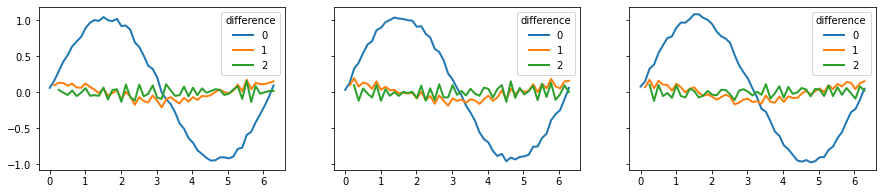

In [22]:
func = np.sin    
x = np.linspace(0, np.pi*2.0, 51)

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,3))
for ax in axes:
    plt.sca(ax)
    y = func(x) + np.random.random( len(x) )*1e-1
    for order in [0,1,2]:
        yy = np.diff( y, order )
        plt.plot(x[order:], yy, lw=2, label=f'{order}')
    plt.legend(loc=0, title='difference')

In [32]:
#np.diff
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html#scipy.integrate.simpson
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html

## Numerical integration
https://en.wikipedia.org/wiki/Numerical_integration


### Midpoint rule
 $$ \int\limits_a^b \, f(x) dx \approx (b-a) \,f\left(\frac{a+b}{2}\right)$$
 

### Trapezoidal rule
 $$ \int\limits_a^b f(x) dx \approx (b-a) \, \left(\frac{f(a)+f(b)}{2}\right)$$ 

### Composition

 $$ \{x_1, x_2, \ldots x_N\} \qquad x_1 < x_2 < \ldots < x_N $$
 
 
 $$ \int\limits_{x_1}^{x_N} \,f(x) dx =
 \int\limits_{x_1}^{x_2} \,f(x) dx +
 \int\limits_{x_2}^{x_3} \,f(x) dx +
 \ldots +
 \int\limits_{x_{n-1}}^{x_N} \,f(x) dx
 $$

In [45]:
func = np.sin
lim = [0, np.pi/2.0]
npoints = 16
x = np.linspace( lim[0], lim[1], npoints )
y = func(x)

In [46]:
xdelta = x[1:] - x[:-1]
xmidpt = (x[1:]+x[:-1]) / 2.0
ymidpt = func( xmidpt )
Imidpt = np.sum( xdelta * ymidpt )

ytrapz = ( func(x[1:]) + func(x[:-1] ) )/2.0  
Itrapz = np.sum( xdelta * ytrapz )

In [47]:
# Midpoint (order=0) and trapezoid (order=1) estimates done "by hand"
#
print( Imidpt, '\t', Itrapz ) 

# Trapezoidal (order=1) and Simpson's rule estimates from python library
#
print( '\t\t\t', scipy.integrate.trapezoid(y, x), '\t', scipy.integrate.simpson(y, x) )

1.000457072318981 	 0.9990859806718271
			 0.9990859806718271 	 0.9999503581135661


In [27]:
# Simpson's rule should be more accurate, but run time is 5x that of trapezoid rule.
#

%timeit scipy.integrate.trapezoid(y, x)
%timeit scipy.integrate.simpson(y, x)

10.2 µs ± 70.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
51.9 µs ± 237 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Adaptive intervals

There are many different ways to sub-divide the limits of integration.  The goal is to maximize accuracy with the fewest number of function evalutions.

In [69]:
def func_sin(x):
    print( 'x = ' , x ) #[str(z)[0:8] for z in x] ) #, np.sin(x))
    return np.sin(x)

In [70]:
for tol in [1e-3, 1e-6, 1e-9]:
    result,uncertainty = scipy.integrate.quadrature( func_sin, lim[0], lim[1], tol=tol )
    print( f'{result} +\- {uncertainty:6.4e} (requested tolerance: {tol:6.4e}) \n')

x =  [0.78539816]
x =  [0.33194832 1.238848  ]
x =  [0.17703136 0.78539816 1.39376496]
x =  [0.10906329 0.51837768 1.05241865 1.46173304]
0.9999999771971152 +\- 8.1444e-06 (requested tolerance: 1.0000e-03) 

x =  [0.78539816]
x =  [0.33194832 1.238848  ]
x =  [0.17703136 0.78539816 1.39376496]
x =  [0.10906329 0.51837768 1.05241865 1.46173304]
x =  [0.07368618 0.36248536 0.78539816 1.20831097 1.49711015]
1.0000000000395652 +\- 2.2842e-08 (requested tolerance: 1.0000e-06) 

x =  [0.78539816]
x =  [0.33194832 1.238848  ]
x =  [0.17703136 0.78539816 1.39376496]
x =  [0.10906329 0.51837768 1.05241865 1.46173304]
x =  [0.07368618 0.36248536 0.78539816 1.20831097 1.49711015]
x =  [0.05303832 0.26608553 0.59798709 0.97280923 1.3047108  1.51775801]
0.9999999999999535 +\- 3.9612e-11 (requested tolerance: 1.0000e-09) 



### Romberg integration
https://en.wikipedia.org/wiki/Romberg%27s_method
http://www.foo.be/docs-free/Numerical_Recipe_In_C/c4-3.pdf

Clever mix of increasing number of samples *and* integration order, followed by extrapolation to final value.

In [51]:
for tol in [1e-3, 1e-6, 1e-9, 1e-12]:
    result,uncertainty = scipy.integrate.romberg( func_sin, lim[0], lim[1], tol=tol, vec_func=True ), 0
    print( f'{result} +\- {1-result:6.4e} (requested tolerance: {tol:6.4e}) \n')

x =  0
x =  1.5707963267948966
x =  [0.78539816]
x =  [0.39269908 1.17809725]
x =  [0.19634954 0.58904862 0.9817477  1.37444679]
1.0000000081440203 +\- -8.1440e-09 (requested tolerance: 1.0000e-03) 

x =  0
x =  1.5707963267948966
x =  [0.78539816]
x =  [0.39269908 1.17809725]
x =  [0.19634954 0.58904862 0.9817477  1.37444679]
x =  [0.09817477 0.29452431 0.49087385 0.68722339 0.88357293 1.07992247
 1.27627202 1.47262156]
0.9999999999980171 +\- 1.9829e-12 (requested tolerance: 1.0000e-06) 

x =  0
x =  1.5707963267948966
x =  [0.78539816]
x =  [0.39269908 1.17809725]
x =  [0.19634954 0.58904862 0.9817477  1.37444679]
x =  [0.09817477 0.29452431 0.49087385 0.68722339 0.88357293 1.07992247
 1.27627202 1.47262156]
0.9999999999980171 +\- 1.9829e-12 (requested tolerance: 1.0000e-09) 

x =  0
x =  1.5707963267948966
x =  [0.78539816]
x =  [0.39269908 1.17809725]
x =  [0.19634954 0.58904862 0.9817477  1.37444679]
x =  [0.09817477 0.29452431 0.49087385 0.68722339 0.88357293 1.07992247
 1.276272

In [33]:
#print( np.gradient(y) )

x = np.linspace(0, np.pi, 99)
y = np.sin(x)

def mydiff(y,n=1):
    
    for order in np.arange(0,n):
        y = y[1:] - y[:-1]
    return y
    
order = 19
y0 = np.diff(y,order) 
y1 = mydiff(y,order)
assert( np.all(y1 == y0) )

# the documentation claims that numpy.diff is recursive for order>1,
# but it doesn't show any signs of trouple for large order.
#
%timeit y0 = np.diff(y,order)
%timeit y1 = mydiff(y,order)



13.8 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.4 µs ± 202 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
